In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [30]:
ds1 = pd.read_csv('covid.csv')

In [31]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [32]:
ds1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [33]:
print(ds1.shape)

(209, 17)


In [34]:
# to handle NaNs
# i want to delete column NewCases, NewDeaths, NewRecovered
ds1.drop([ 'NewCases', 'NewDeaths', 'NewRecovered'], axis = 1, inplace= True)

In [35]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
 13  iso_alpha         209 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 23.0+ KB


In [36]:
import seaborn as sns

<ipython-input-38-e41f1ea0ab14>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


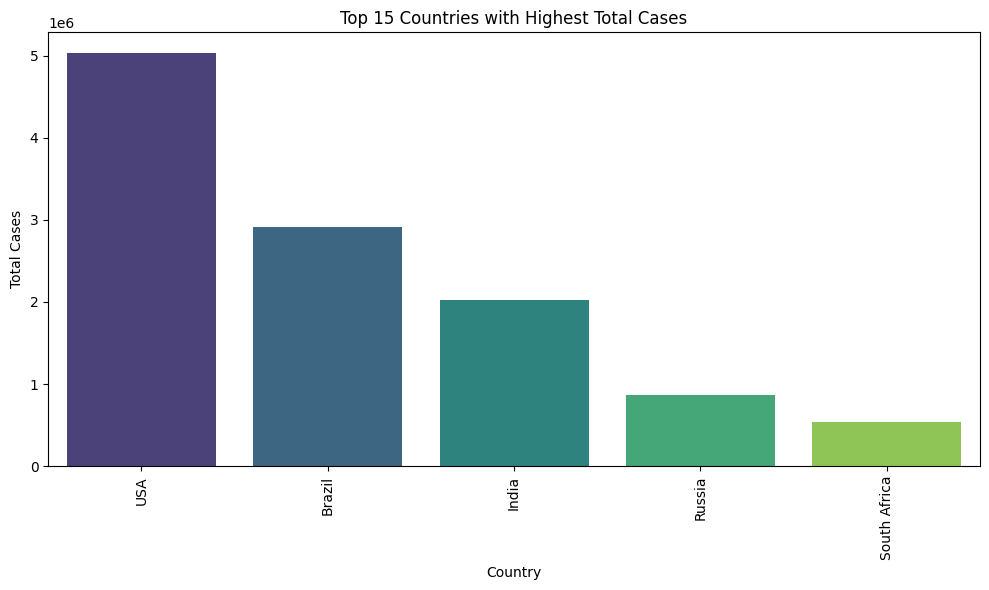

In [38]:
top15 = ds1.head(5)

plt.figure(figsize = (10, 6))

barplot = sns.barplot(
    data = top15,
    x = 'Country/Region',
    y = 'TotalCases',
)

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 15 Countries with Highest Total Cases')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<ipython-input-53-0a3f0b0f1f12>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-0a3f0b0f1f12>:8: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



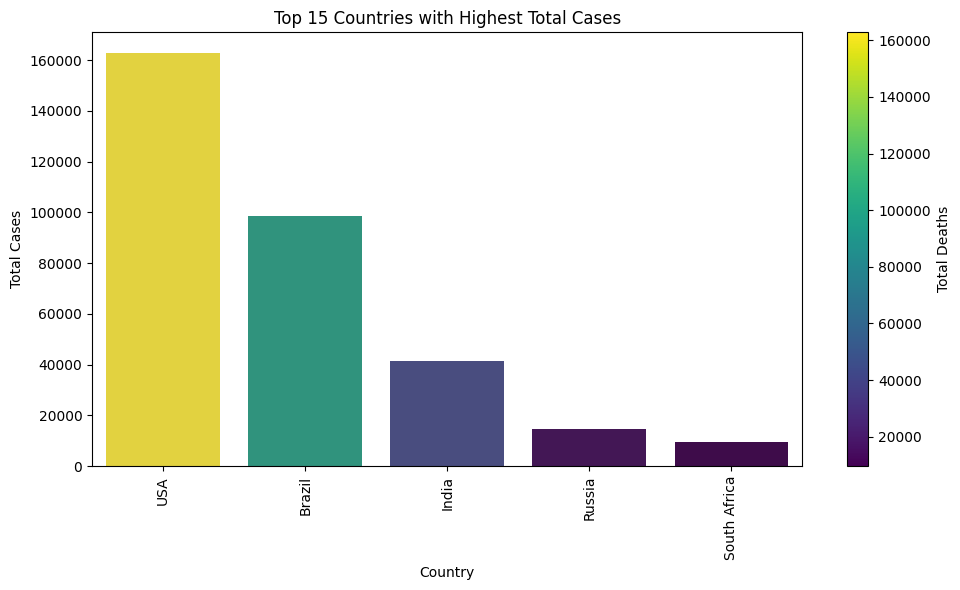

In [53]:
top5 = ds1.head(5)

normalized = plt.Normalize(top5['TotalDeaths'].min(), top5['TotalDeaths'].max())
colors = plt.cm.viridis(normalized(top5['TotalDeaths']))

fig, ax = plt.subplots(figsize = (10, 6))

barplot = sns.barplot(
  data = top5,
  x = 'Country/Region',
  y = 'TotalDeaths',
  palette = colors,
  ax = ax
)

# for i, row in top5.iterrows():
#     barplot.text(
#         i, row['TotalCases'],
#         f"{row['TotalDeaths']:,}",
#         ha='center', va='bottom', fontsize=8
#     )


sm = plt.cm.ScalarMappable(cmap = 'viridis', norm = normalized)
sm.set_array([])
cbar = plt.colorbar(sm, ax = ax)
cbar.set_label('Total Deaths')

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 15 Countries with Highest Total Cases')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [46]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

import matplotlib.pyplot as plt

# Importing Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Initializing Plotly
pio.renderers.default = 'colab'

In [50]:
px.bar(
    ds1.head(5),
    x = 'Country/Region',
    y = 'TotalCases',
    title = 'Top 5 Countries with Highest Total Cases',
    height = 500,
    color = 'TotalDeaths',
    hover_data = ['Country/Region', 'Continent']
)

In [54]:
px.bar(
    ds1.head(5),
    x = 'Country/Region',
    y = 'TotalCases',
    title = 'Top 5 Countries with Highest Total Cases',
    height = 500,
    color = 'TotalTests',
    hover_data = ['Country/Region', 'Continent']
)

In [59]:
px.bar(
    ds1.head(5),
    x = 'TotalTests',
    y = 'Continent',
    title = 'Top 5 Countries with Highest Total Cases',
    height = 500,
    color = 'TotalTests',
    orientation = 'h',
    hover_data = ['Country/Region', 'Continent']
)

In [62]:

px.scatter(
    ds1,
    x = 'Continent',
    y = 'TotalCases',
    color = 'TotalCases',
    size = 'TotalCases',

    size_max = 80,
    title = 'Top 5 Countries with Highest Total Cases',
)


In [63]:
px.scatter(
    ds1,
    x = 'TotalCases',
    y = 'Continent',
    color = 'TotalCases',
    size = 'TotalCases',

    size_max = 80,
    title = 'Top 5 Countries with Highest Total Cases',
)

In [ ]:
# Let’s take a look at the country-wise data visualization, first look at the
# continent with respect to the total number of deaths by the top 50 countries
# only and color the total number of deaths and take the hover data as
# ‘Country/Region’, ‘Continent’.

In [65]:
px.scatter(
    ds1.head(100),
    x = 'Country/Region',
    y = 'TotalCases',
    color = 'TotalCases',
    size = 'TotalCases',
    size_max = 80,
    title = 'Top 100 Countries with Highest Cases',
    hover_data = ['Country/Region', 'Continent']
)

In [ ]:
# Now, the Country/Region with respect to the total number of cases for top 30
# countries only and color the total number of cases and take the hover
# data as ‘Country/Region’, ‘Continent’.

In [66]:
px.scatter(
    ds1.head(30),
    x = 'Country/Region',
    y = 'TotalCases',
    color = 'Country/Region',
    size = 'TotalCases',
    size_max = 80,
    title = 'Top 100 Countries with Highest Cases',
    hover_data = ['Country/Region', 'Continent']
)

In [ ]:
# Now format the image of the country/region in relation to the total number
# of deaths. And do the same for the other aspects of COVID-19 from dataset1.

In [67]:
px.scatter(
    ds1.head(10),
    x = 'Country/Region',
    y = 'TotalDeaths',
    color = 'Country/Region',
    size = 'TotalDeaths',
    size_max = 80,
    title = 'Top 100 Countries with Highest Deaths',
    hover_data = ['Country/Region', 'Continent']
)

In [76]:
ds2 = pd.read_csv('covid_grouped.csv')

In [79]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


In [80]:
ds2.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [81]:
df_us = ds2[ds2['Country/Region'] == 'US']

In [82]:
df_us.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
173,2020-01-22,US,1,0,0,1,0,0,0,Americas,USA
360,2020-01-23,US,1,0,0,1,0,0,0,Americas,USA
547,2020-01-24,US,2,0,0,2,1,0,0,Americas,USA
734,2020-01-25,US,2,0,0,2,0,0,0,Americas,USA
921,2020-01-26,US,5,0,0,5,3,0,0,Americas,USA


In [84]:
px.bar(
    df_us,
    x = 'Date',
    y = 'Confirmed',
    title = 'US Confirmed Analysis',
    height = 500,
    color = 'Confirmed',
)

In [85]:
px.bar(
    df_us,
    x = 'Date',
    y = 'Recovered',
    title = 'US Recovered Analysis',
    height = 500,
    color = 'Recovered',
)

In [87]:
px.line(
    df_us,
    x = 'Date',
    y = 'Recovered',
    title = 'US Recovered Analysis',
    height = 500,
)

In [88]:
px.line(
    df_us,
    x = 'Date',
    y = 'Deaths',
    title = 'US Recovered Analysis',
    height = 500,
)

In [91]:
px.line(
    df_us,
    x = 'Date',
    y = 'New cases',
    title = 'US New Case Analysis',
    height = 500,
)

In [94]:
px.choropleth(ds2,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region",
              color_continuous_scale="Blues",
              animation_frame="New cases"
            )

In [96]:
ds3 = pd.read_csv('coviddeath.csv')
ds3.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN


In [97]:
ds3.tail()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
12255,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,65-74,5024.0,NaN
12256,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,75-84,5381.0,NaN
12257,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,85+,4841.0,NaN
12258,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,Not stated,NaN,Counts less than 10 suppressed.
12259,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,All ages,20628.0,NaN


In [98]:
ds3.groupby(['Condition']).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
Condition,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,272,268
All other conditions and causes (residual),540,540,540,540,540,540,540,363,177
Alzheimer disease,530,530,530,530,530,530,530,144,386
COVID-19,540,540,540,540,540,540,540,377,163
Cardiac arrest,520,520,520,520,520,520,520,219,301
Cardiac arrhythmia,540,540,540,540,540,540,540,192,348
Cerebrovascular diseases,530,530,530,530,530,530,530,187,343
Chronic lower respiratory diseases,540,540,540,540,540,540,540,229,311
Diabetes,540,540,540,540,540,540,540,276,264


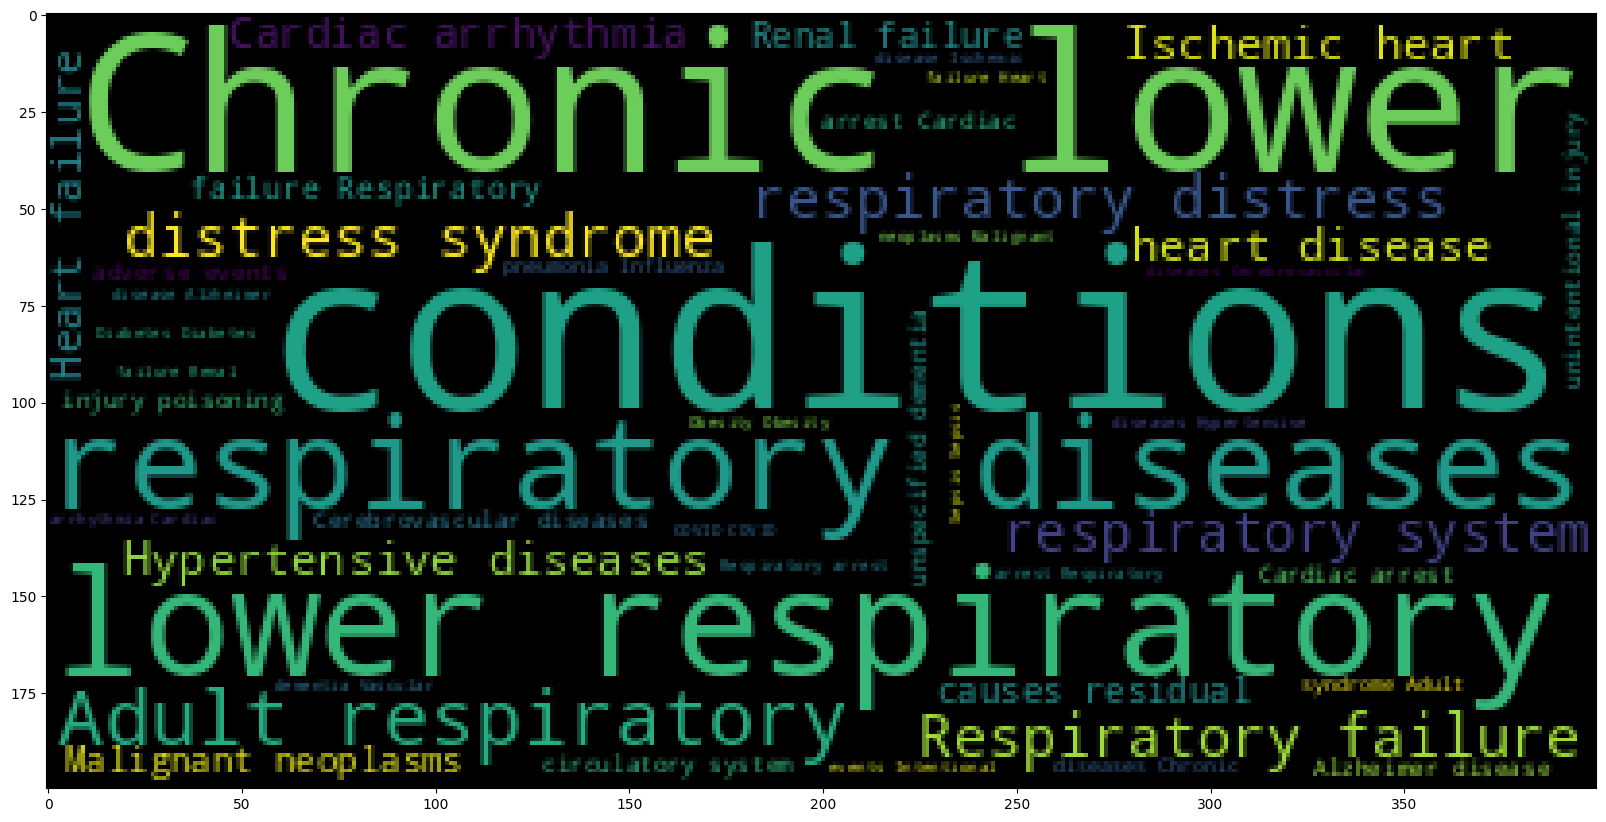

In [102]:
from wordcloud import WordCloud

sentences = ds3['Condition'].tolist()
words = ' '.join(sentences)

plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(words))